In [1]:
library(Seurat)
library(ggplot2)
# library(enrichR)
library(stringr)
library(RColorBrewer)
library(pheatmap)
library(dplyr)
library(scales)
library(dplyr)
library(ComplexHeatmap)
library(circlize)
library(tidyr)
library(tibble)
library(grid)

Warning message:
“package ‘Seurat’ was built under R version 4.3.3”
Loading required package: SeuratObject

Warning message:
“package ‘SeuratObject’ was built under R version 4.3.3”
Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.3.3”

Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Warning message:
“package ‘stringr’ was built under R version 4.3.3”
Warning message:
“package ‘RColorBrewer’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘scales’ was built under R version 4.3.3”
Loading required package: grid

ComplexHeatmap version 2.18.0
Bio

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11332
Number of edges: 631561

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8353
Number of communities: 11
Elapsed time: 2 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
00:46:03 UMAP embedding parameters a = 0.9922 b = 1.112

00:46:03 Read 11332 rows and found 30 numeric columns

00:46:03 Using Annoy for neighbor search, n_neighbors = 30

00:46:03 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

00:46:07 Writing NN index file to temp file /tmp/Rtmpy7gPpZ/file103c1450a607db

00:46:07 Searching Annoy index using 1 thread, search_k = 3000

00:46:11 Annoy recall = 64.28%

00:46:12 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighb

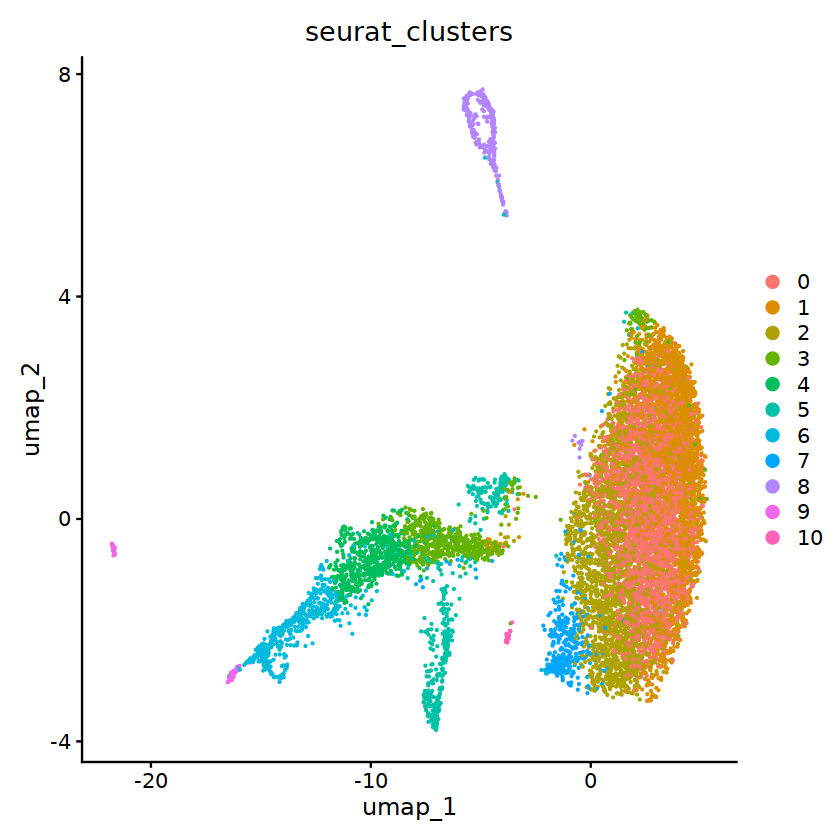

In [ ]:
ifnb = readRDS("hc_rbd_pd_joint_integrated.rds")
ifnb_testct <- subset(ifnb, subset = celltype == "microglia")
ifnb_testct <- FindNeighbors(ifnb_testct, reduction = "integrated.cca", dims = 1:30)
ifnb_testct <- FindClusters(ifnb_testct, resolution = 0.5)
ifnb_testct <- RunUMAP(ifnb_testct, dims = 1:30, reduction = "integrated.cca")
DimPlot(ifnb_testct, reduction = "umap", group.by = c("seurat_clusters"))

# Exploratory plots

### Boxplot of BAM proportion per individual

In [ ]:
# Extract metadata and compute cluster 8 proportions per individual
cluster_8_counts <- ifnb_testct@meta.data %>%
  group_by(batch, disease) %>%
  summarise(
    cluster_8_count = sum(seurat_clusters == 8),  # Count of cluster 8 cells
    total_cells = n(),  # Total number of cells per individual
    cluster_8_prop = cluster_8_count / total_cells  # Compute proportion
  )

# Compute IQR to detect outliers
Q1 <- quantile(cluster_8_counts$cluster_8_prop, 0.25)  # First quartile
Q3 <- quantile(cluster_8_counts$cluster_8_prop, 0.75)  # Third quartile
IQR_val <- Q3 - Q1  # Compute IQR

# Define lower and upper bounds for outliers
lower_bound <- Q1 - 1.5 * IQR_val
upper_bound <- Q3 + 1.5 * IQR_val

# Remove specific batches
filtered_data <- cluster_8_counts %>%
  filter(!(batch %in% c("HC0763PFC_MAH", "HC1074PFC_MAH", "HC1821PFC_MAH", "HC1915PFC_MAH")))

filtered_data$disease <- as.factor(filtered_data$disease)

# Save plot as PDF
pdf("../../man_figs_pdf/bam_prop_boxplot_disease.pdf", width = 8, height = 8)

# Create a boxplot with scatter points
ggplot(filtered_data, aes(x = disease, y = cluster_8_prop, fill = disease)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.6) +  # Hide outlier points in boxplot
  geom_jitter(aes(color = disease), width = 0.2, size = 2, alpha = 1.0) +  # Scatter points
  stat_summary(aes(y = cluster_8_prop), fun = mean, geom = "crossbar", 
               width = 0.5, color = "black", linetype = "dashed", show.legend = FALSE) +  
  theme_minimal() +
  labs(title = "Proportion of BAM Cells per Individual",
       x = "Disease",
       y = "Proportion of BAM Cells") +
  theme(legend.position = "none")  # Remove legend for cleaner visualization

dev.off()

`summarise()` has grouped output by 'batch'. You can override using the
`.groups` argument.


pdf 
  2

In [5]:
filtered_data

batch,disease,cluster_8_count,total_cells,cluster_8_prop
<chr>,<fct>,<int>,<int>,<dbl>
HC0772PFC_MAH,HC,0,426,0.000000000
HC0931PFC_MAH,HC,1,638,0.001567398
HC1073PFC_MAH,HC,0,463,0.000000000
HC1419PFC_MAH,HC,1,300,0.003333333
HC1611PFC_MAH,HC,9,309,0.029126214
HC1719PFC_MAH,HC,0,298,0.000000000
HC1817PFC_MAH,HC,2,301,0.006644518
HC1855PFC_MAH,HC,0,274,0.000000000
HC1860PFC_MAH,HC,0,412,0.000000000


### Examine potential outliers

In [6]:
# Extract metadata and compute cluster 8 proportions per individual
cluster_8_counts <- ifnb_testct@meta.data %>%
  group_by(batch, disease) %>%
  summarise(
    cluster_8_count = sum(seurat_clusters == "8"),  # Count of cluster 8 cells
    total_cells = n(),  # Total number of cells per individual
    cluster_8_prop = cluster_8_count / total_cells  # Compute proportion
  )

# Compute IQR (Interquartile Range) to detect outliers
Q1 <- quantile(cluster_8_counts$cluster_8_prop, 0.25)  # First quartile
Q3 <- quantile(cluster_8_counts$cluster_8_prop, 0.75)  # Third quartile
IQR_val <- Q3 - Q1  # Compute IQR

# Define lower and upper bounds for outliers
lower_bound <- Q1 - 1.5 * IQR_val
upper_bound <- Q3 + 1.5 * IQR_val

# Find outliers
outliers <- cluster_8_counts %>%
  filter(cluster_8_prop < lower_bound | cluster_8_prop > upper_bound)

# Print the outliers
print(outliers)

`summarise()` has grouped output by 'batch'. You can override using the
`.groups` argument.


# A tibble: 8 × 5
# Groups:   batch [8]
  batch          disease cluster_8_count total_cells cluster_8_prop
  <chr>          <chr>             <int>       <int>          <dbl>
1 HC0763PFC_MAH  HC                   41         117         0.350 
2 HC1074PFC_MAH  HC                    6          50         0.12  
3 HC1611PFC_MAH  HC                    9         309         0.0291
4 HC1821PFC_MAH  HC                   38         335         0.113 
5 HC1915PFC_MAH  HC                   34         270         0.126 
6 PD0517PFC_MAH  PD                   73         792         0.0922
7 RBD1835PFC_MAH RBD                  26         443         0.0587
8 RBD1848PFC_MAH RBD                  21         299         0.0702


### UMAP of BAM cells colored by disease

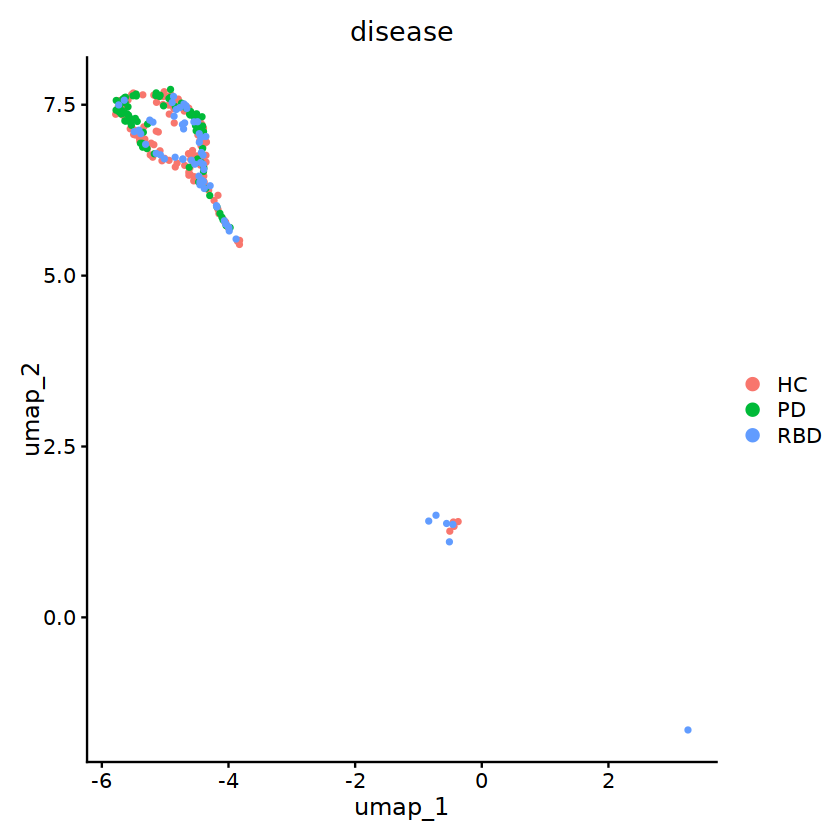

In [6]:
test1 <- subset(ifnb_testct, subset = seurat_clusters %in% c(8))
DimPlot(test1, reduction = "umap", group.by = c("disease"))

### BAM Marker Gene Expression

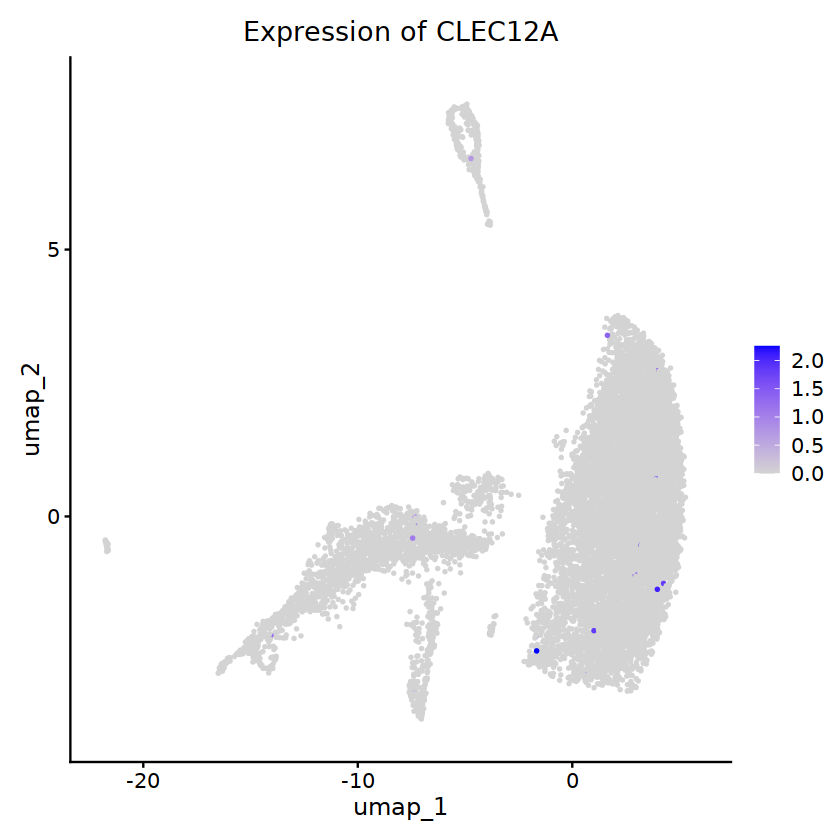

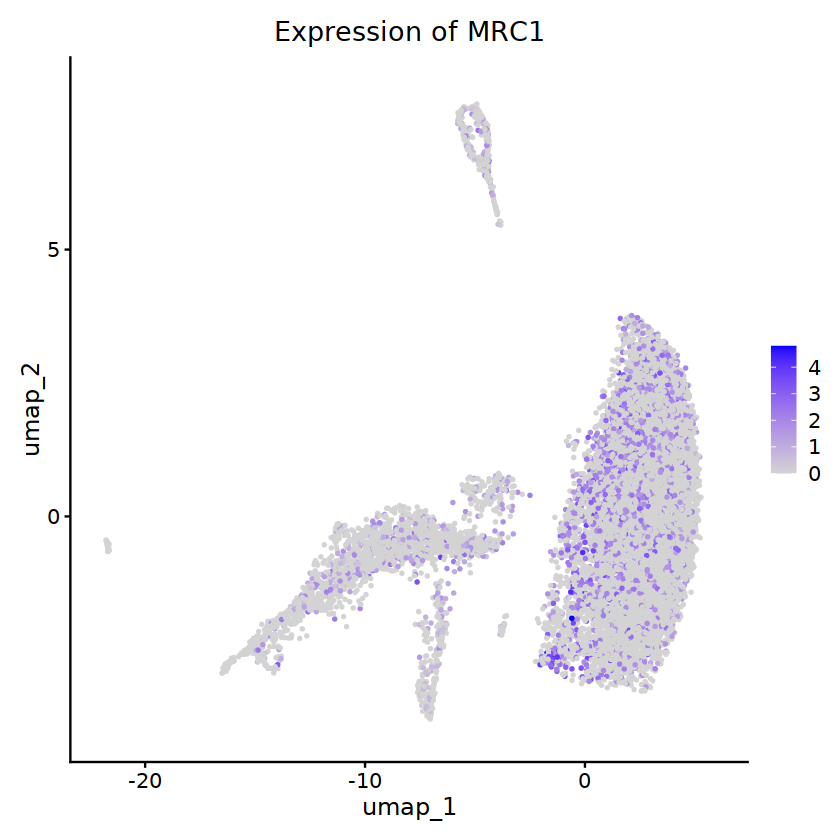

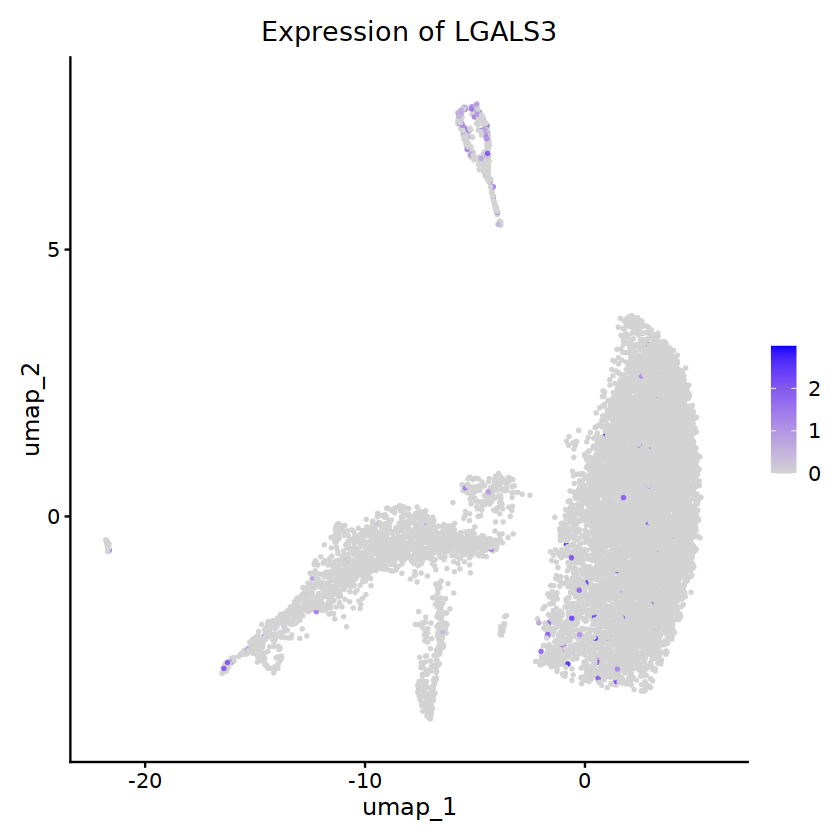

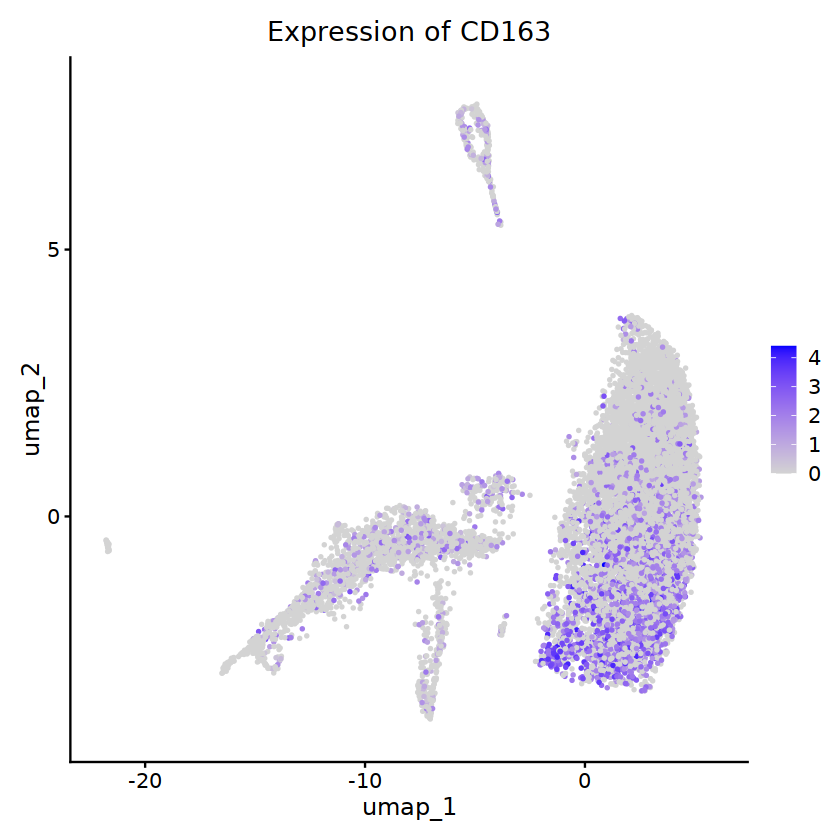

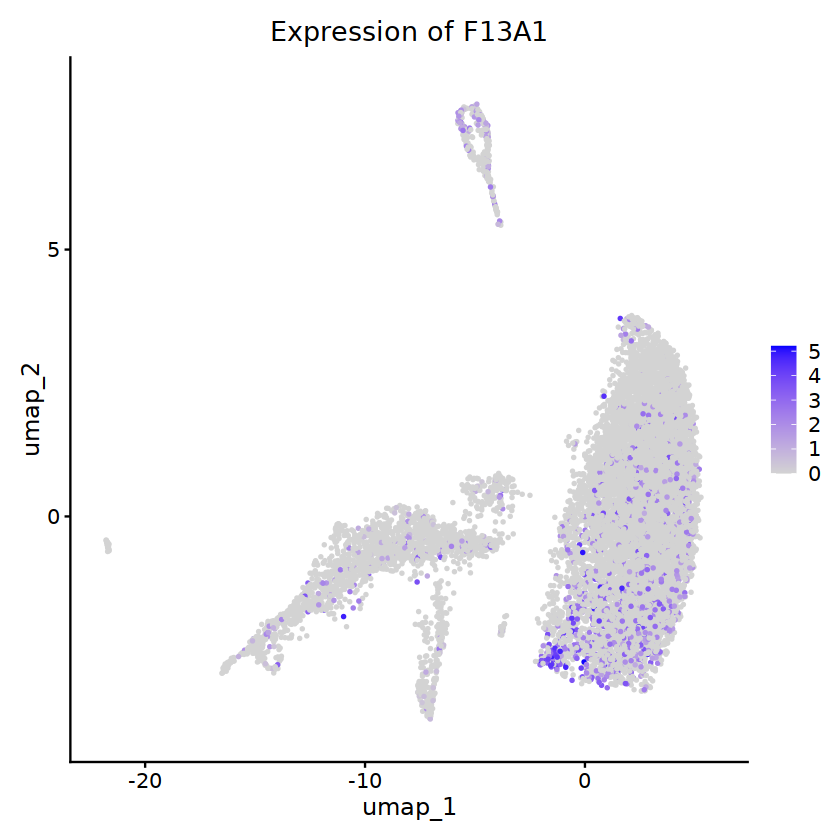

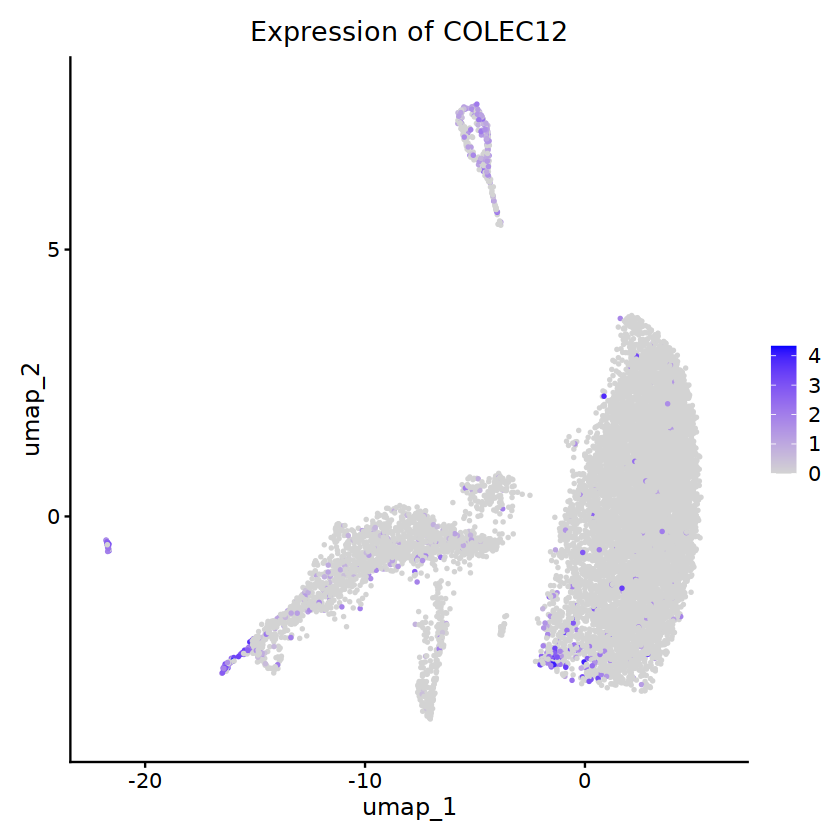

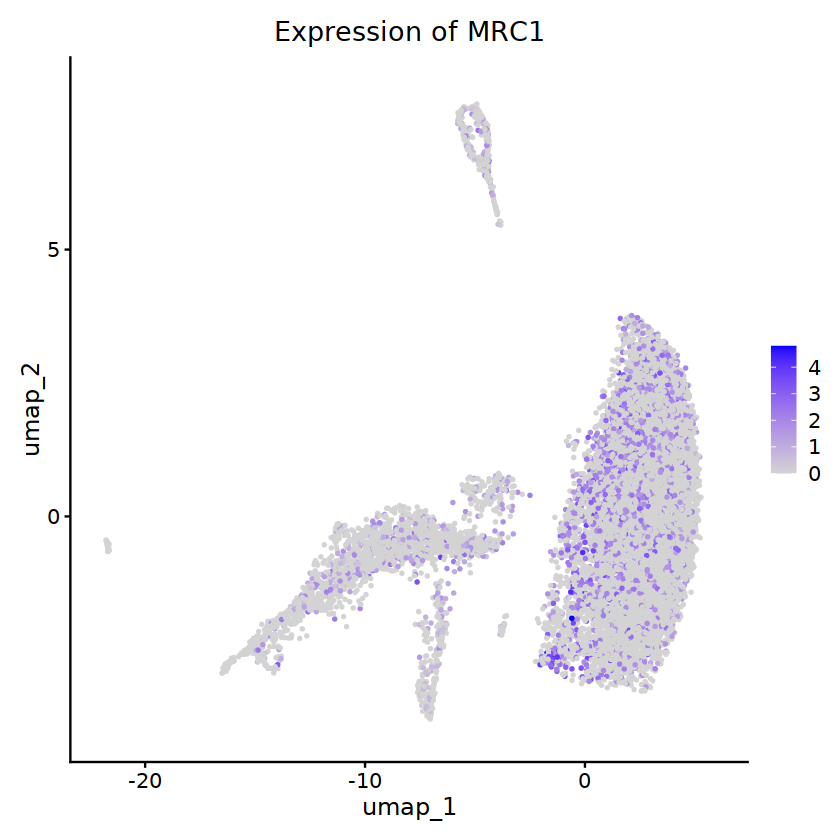

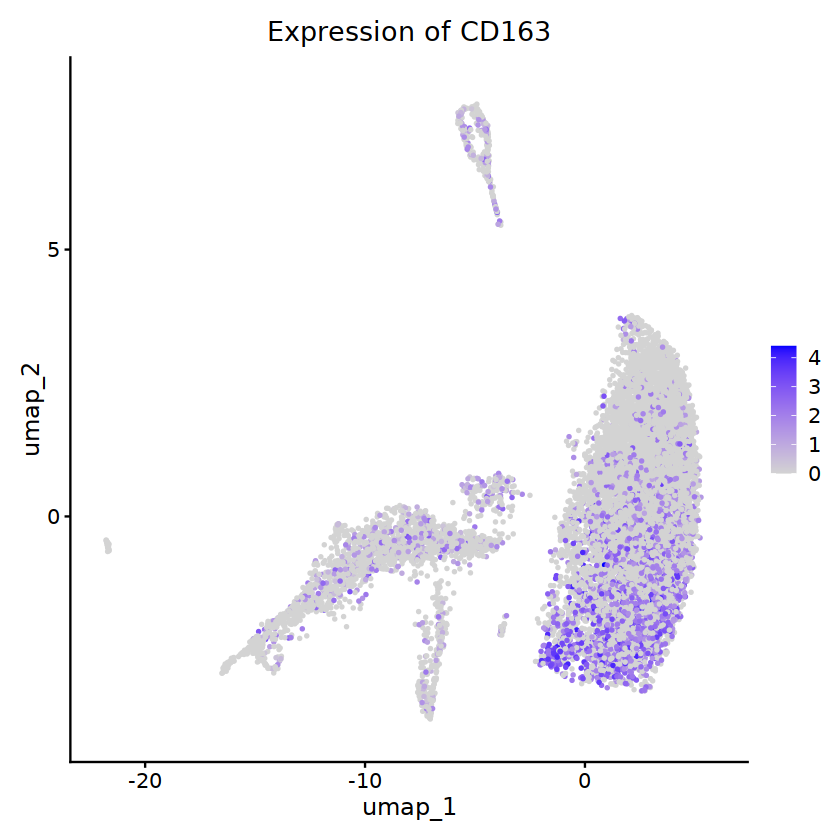

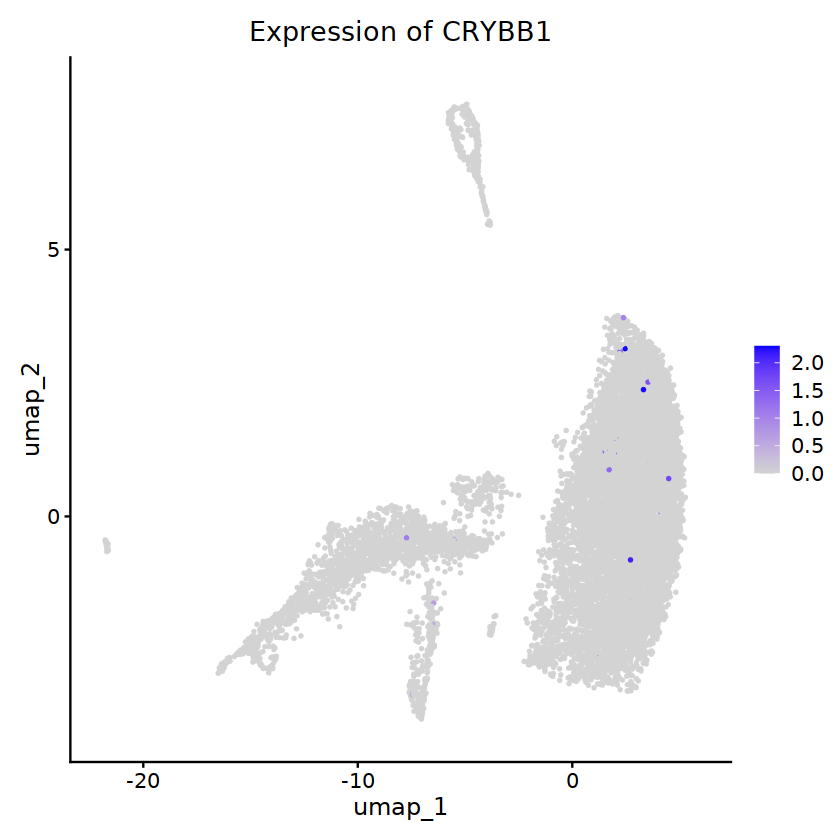

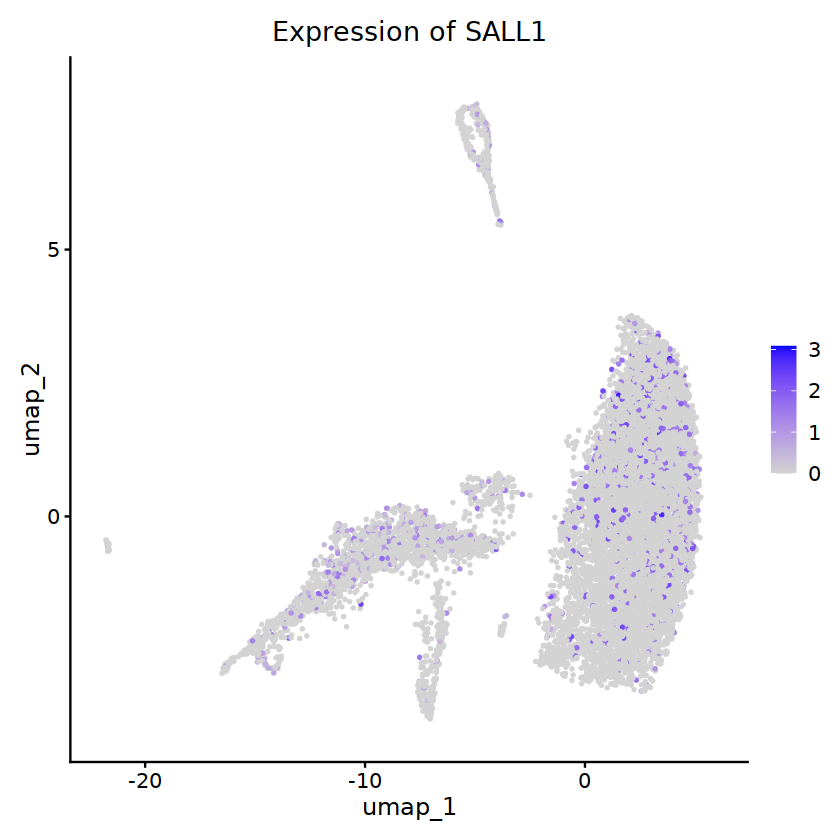

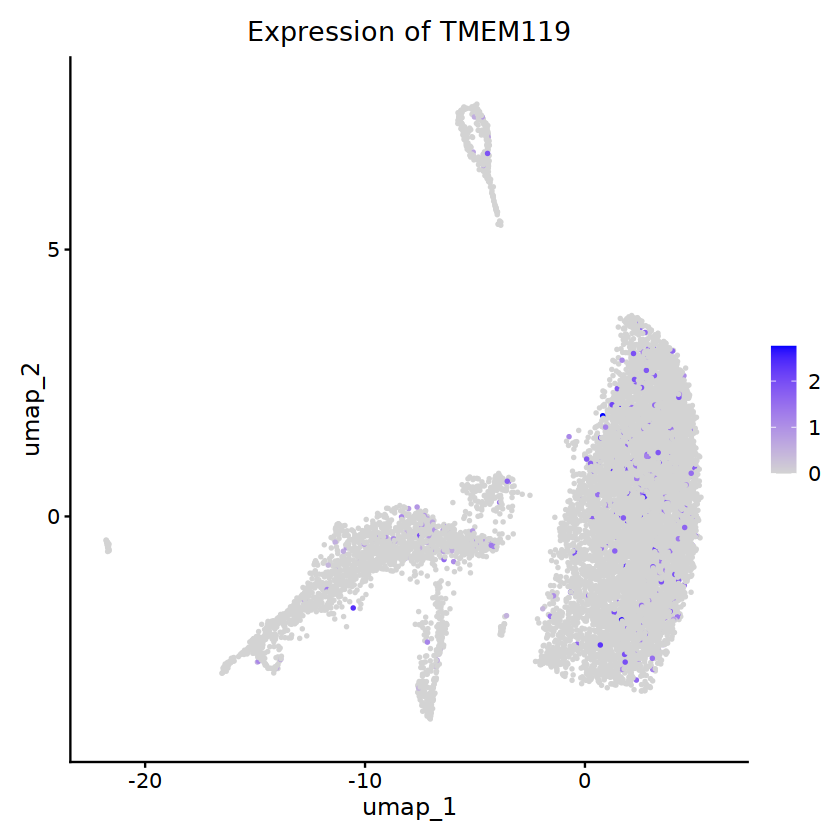

In [3]:
BAM_genes <- c("CLEC12A", "MRC1", "LGALS3", "CD163", "F13A1", "COLEC12", "CRYBB1", "SALL1", "TMEM119")
# Loop through each gene in BAM_genes and create a FeaturePlot
for (gene in BAM_genes) {
  if (gene %in% rownames(ifnb_testct)) { # Check if the gene exists in the Seurat object
    p <- FeaturePlot(
      object = ifnb_testct,
      features = gene,
      reduction = "umap",
      cols = c("lightgrey", "blue"), # Customize the color gradient for expression
      pt.size = 0.5                  # Adjust point size
    ) + 
    ggtitle(paste("Expression of", gene))
    
    print(p) # Display the plot
  } else {
    cat(paste("Gene", gene, "not found in Seurat object\n"))
  }
}


In [ ]:
# Define the list of genes
BAM_genes <- c("CLEC12A", "MRC1", "LGALS3", "CD163", "F13A1", "COLEC12", "MRC1", "CD163")

# Subset the Seurat object
sub_MG8 <- subset(ifnb_testct, subset = seurat_clusters == 8)

# Loop through each gene and generate/save plots
for (gene in BAM_genes) {
  if (gene %in% rownames(ifnb_testct)) { # Check if gene is in the object
    # Create the FeaturePlot
    plot <- FeaturePlot(
      sub_MG8, 
      features = gene, 
      split.by = "disease", 
      reduction = "umap",
      cols = c("lightgrey", "blue") # This affects only expression, not groups
    )
    
    # Define the PDF filename for this gene
    pdf_name <- paste0("../../man_figs_pdf/BAM_disease_umap_", gene, ".pdf")
    
    # Save the plot into a separate PDF
    pdf(pdf_name, width = 12, height = 6)
    print(plot)
    dev.off() # Close the device for this plot
  } else {
    message(paste("Gene", gene, "not found in the dataset."))
  }
}

Warning message:
“All cells have the same value (0) of “CLEC12A””
Warning message:
“All cells have the same value (0) of “CLEC12A””


# Why is the original Mic subtype 8 defined as BAM?

## 1. Dot Plot of Signature Score for BAM vs Homeostatic genes

**Percent Scored** refers to the percentage of cells within a group (e.g., a cluster) that express any of the genes in the specified signature above a certain threshold

- (Size = Percent Score) The bigger the circle, the more cells within that cluster express the genes of interest above a certain threshold
- (Color = Average Score) The darker the circle, the most highly expressed the genes of interest are within that cluster

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


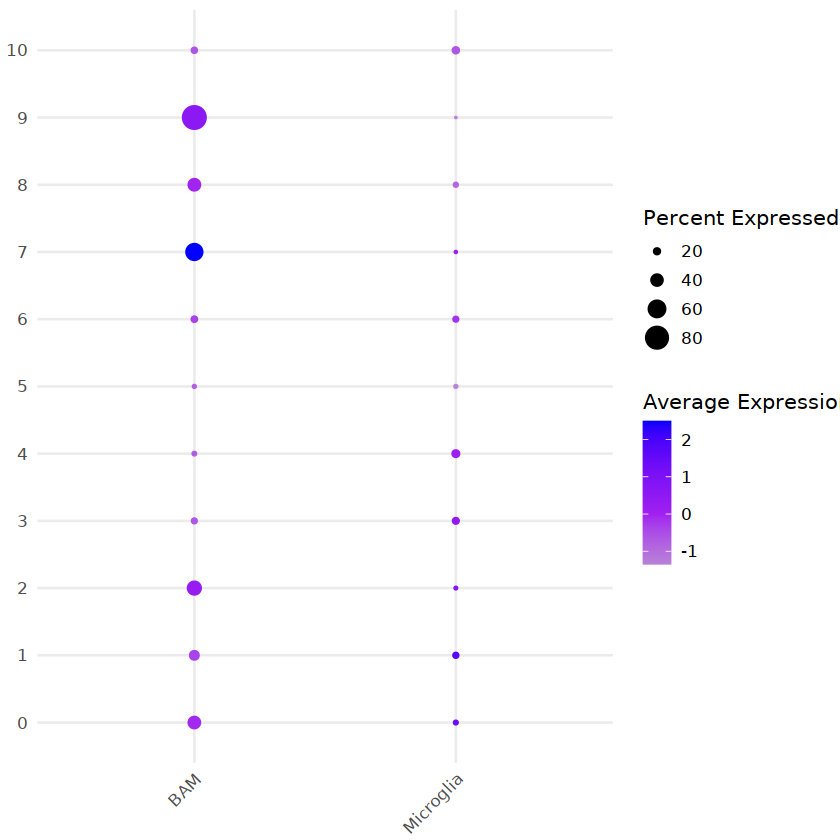

In [5]:
# Define the gene sets
BAM_genes <- c("CLEC12A", "MRC1", "LGALS3", "CD163", "F13A1", 
               "COLEC12", "MRC1", "CD163")
mic_genes <- c("CRYBB1", "SALL1", "TMEM119")

# Add BAM and microglia gene scores to the metadata of the Seurat object
ifnb_testct <- AddModuleScore(
  object = ifnb_testct,
  features = list(BAM = BAM_genes, Microglia = mic_genes),
  name = "Signature"
)

# Signature scores will be stored as `Signature1` (for BAM) and `Signature2` (for Microglia)

# Generate the Dot Plot for signature scores across clusters
dot_plot <- DotPlot(
  object = ifnb_testct,
  features = c("Signature1", "Signature2"),  # Signature scores
  group.by = "seurat_clusters"              # Group by microglial states
) +
  scale_color_gradient2(low = "grey", mid = "purple", high = "blue", midpoint = 0, name = "Average score") +
  scale_x_discrete(labels = c("Signature1" = "BAM", "Signature2" = "Microglia")) +  # Rename x-axis labels
  theme_minimal(base_size = 12) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(),
        axis.title.y = element_blank()) +
  labs(size = "Percent Scored", color = "Average score")

# Display the plot
print(dot_plot)

*strongest enrichment of BAM signature genes compared to Microglia genes in Cluster 7 & 9​

## 2. Heatmap for BAM genes for each cluster

As of Seurat v5, we recommend using AggregateExpression to perform pseudo-bulk analysis.
This message is displayed once per session.
First group.by variable `seurat_clusters` starts with a number, appending `g` to ensure valid variable names
This message is displayed once every 8 hours.


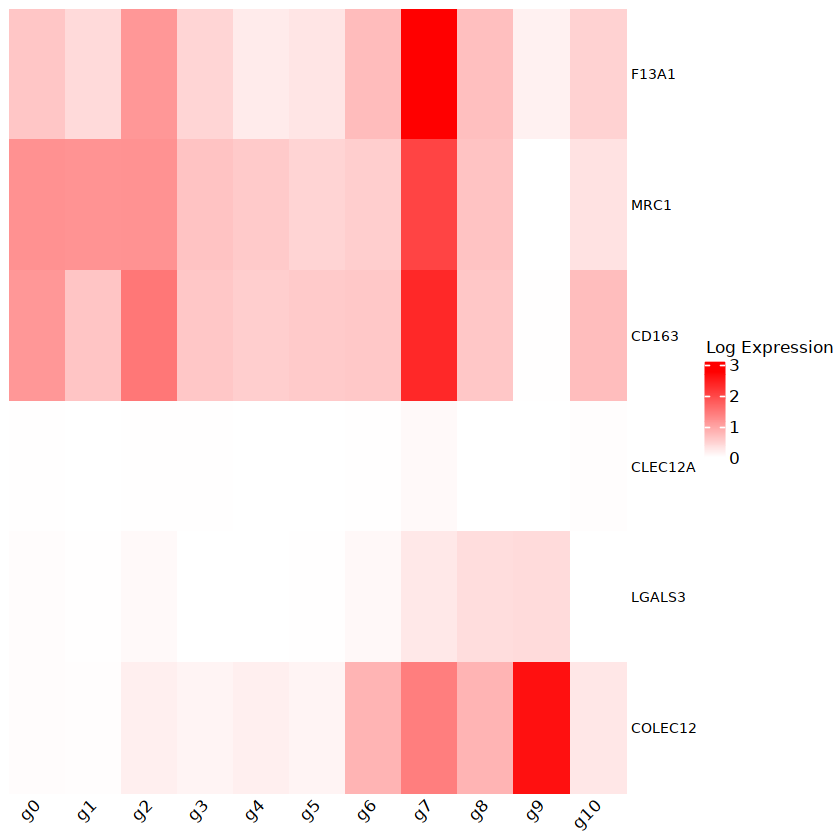

In [3]:
BAM_genes <- c("CLEC12A", "MRC1", "LGALS3", "CD163", "F13A1", "COLEC12")
# Filter BAM genes to keep only those present in the Seurat object
BAM_genes <- BAM_genes[BAM_genes %in% rownames(ifnb_testct)]

# Average expression per cluster
avg_expr <- AverageExpression(
  object = ifnb_testct,
  features = BAM_genes,
  group.by = "seurat_clusters",
  slot = "data"  # Use normalized data for averaging
)$RNA

# Log-transform the average expression values
log_avg_expr <- log1p(avg_expr)  # log1p(x) = log(1 + x)

# Ensure that the input is a matrix
log_avg_expr_matrix <- as.matrix(log_avg_expr)

Heatmap(
  log_avg_expr_matrix,
  name = "Expression",
  cluster_rows = FALSE,
  cluster_columns = FALSE,
  col = colorRampPalette(c("white", "red"))(100),
  column_names_rot = 45,  # Rotate column names
  row_names_gp = gpar(fontsize = 8),
  column_names_gp = gpar(fontsize = 10),
  heatmap_legend_param = list(title = "Log Expression")
)

Clusters 7 & 9 have highest log avg
expression of BAM genes

## 3. Heatmap of avg expression of BAM genes for Clusters vs Disease 

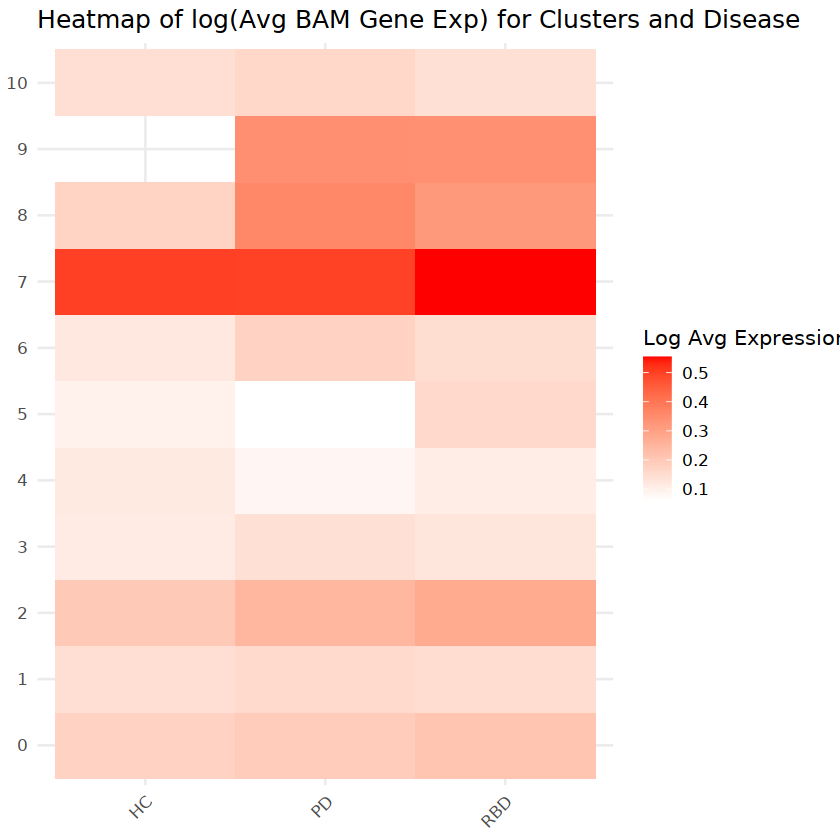

In [17]:
# BAM gene list
BAM_genes <- unique(c("CLEC12A", "MRC1", "LGALS3", "CD163", "F13A1", "COLEC12"))

# Ensure BAM_genes are present in the Seurat object
BAM_genes <- BAM_genes[BAM_genes %in% rownames(ifnb_testct)]

# Extract metadata and expression data
meta <- ifnb_testct@meta.data %>% rownames_to_column(var = "Cell")
expr <- GetAssayData(ifnb_testct, slot = "data", assay = "RNA")[BAM_genes, ]

# Add cluster and disease information to the expression data
expr_long <- expr %>%
  as.data.frame() %>%
  rownames_to_column("Gene") %>%
  pivot_longer(cols = -Gene, names_to = "Cell", values_to = "Expression") %>%
  left_join(meta %>% select(Cell, seurat_clusters, disease), by = "Cell")

# Summarize log average expression by cluster and disease
bam_expression_summary <- expr_long %>%
  group_by(seurat_clusters, disease) %>%
  summarise(LogAverageExpression = log1p(mean(Expression)), .groups = "drop")

# Create the heatmap
ggplot(bam_expression_summary, aes(x = disease, y = seurat_clusters, fill = LogAverageExpression)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "red", name = "Log Avg Expression") +
  theme_minimal(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title = element_blank()
  ) +
  labs(title = "Heatmap of log(Avg BAM Gene Exp) for Clusters and Disease")

Clusters 8 & 2 & 9 show different log avg BAM gene expression across disease status​

Cluster 9 do not have much expression of BAM genes for HC, so the difference we see across disease may not be entirely true​

Cluster 8, on the other hand, shows much more promising difference in disease (tested using Wilcoxon next)

## 4. Wilcoxon Rank Sum Test if BAM genes signficantly different between pairs of disease


In [ ]:
library(rstatix)
wilcoxon_avg_plot <- function(ifnb_testct, compare1, compare2) {
    # Define BAM genes
    BAM_genes <- unique(c("CLEC12A", "MRC1", "LGALS3", "CD163", "F13A1", "COLEC12"))
    
    # Fetch expression data for all BAM genes plus cluster and disease info
    expr_data <- FetchData(ifnb_testct, vars = c(BAM_genes, "seurat_clusters", "disease"))
    
    # Filter to include only the specified disease groups
    expr_data <- expr_data %>% 
        filter(disease %in% c(compare1, compare2))
    
    # Compute the average BAM gene expression per cell
    expr_data <- expr_data %>%
        rowwise() %>%
        mutate(BAM_avg = mean(c_across(all_of(BAM_genes)), na.rm = TRUE)) %>%
        ungroup()
    
    # Initialize a results dataframe
    results <- data.frame(
        Cluster = character(), 
        P_value = numeric(),
        Effect_Size = numeric(),
        stringsAsFactors = FALSE
    )
    
    # Loop through each cluster and perform Wilcoxon rank-sum test
    for (cluster in unique(expr_data$seurat_clusters)) {
        cluster_data <- expr_data %>% filter(seurat_clusters == cluster)
        
        # Ensure both disease groups are present in this cluster
        if (length(unique(cluster_data$disease)) > 1) {
            test <- wilcox_test(cluster_data, BAM_avg ~ disease)  # Using rstatix to extract Z-score
            Z_value <- test$statistic / sqrt(nrow(cluster_data))  # Compute effect size
            
            # Store results
            results <- rbind(results, data.frame(
                Cluster = cluster, 
                P_value = test$p, 
                Effect_Size = abs(Z_value)  # Absolute effect size for visualization
            ))
        }
    }
    
    # Adjust p-values for multiple testing using FDR correction
    results$Adjusted_P_value <- p.adjust(results$P_value, method = "fdr")
    
    # Add comparison name
    results$Comparison <- paste(compare1, "vs", compare2)
    
    # Convert to numeric for plotting
    results$Cluster <- as.numeric(as.character(results$Cluster))
    results$log_p_value <- -log10(results$Adjusted_P_value)
    
    # Plot p-values using effect size for dot size
    p <- ggplot(results, aes(x = Comparison, y = as.factor(Cluster), 
                             size = Effect_Size, fill = log_p_value)) +
        geom_point(shape = 21, color = "black") +
        scale_fill_gradient(low = "white", high = "red") +  # Adjust colors as needed
        scale_size(range = c(2, 10)) +  # Adjust dot sizes for better visibility
        labs(title = "BAM Gene Enrichment Across Clusters",
             x = "Disease Comparison",
             y = "Seurat Cluster",
             fill = "-log10(adj p-value)", 
             size = "Effect Size (r)") +
        theme_minimal()
    
    # Print results and plot
    print(results %>% filter(Adjusted_P_value < 0.05) %>% arrange(Adjusted_P_value))  # Print significant clusters
    pdf(sprintf("../../man_figs_pdf/bam_wilcoxon_dotplot_%s_vs_%s.pdf", compare1, compare2), width = 9, height = 8)
    print(p)
    dev.off()
}

# Example run:
wilcoxon_avg_plot(ifnb_testct, "HC", "PD")
wilcoxon_avg_plot(ifnb_testct, "HC", "RBD")
wilcoxon_avg_plot(ifnb_testct, "RBD", "PD")

   Cluster  P_value Effect_Size Adjusted_P_value Comparison log_p_value
W        8 5.34e-12    155.0801        5.340e-11   HC vs PD   10.272459
W4       2 2.23e-05   7150.8020        1.115e-04   HC vs PD    3.952725


pdf 
  2

   Cluster  P_value Effect_Size Adjusted_P_value Comparison log_p_value
W4       2 1.38e-12   5881.1256     1.380000e-11  HC vs RBD   10.860121
W3       5 1.51e-06    636.1144     7.550000e-06  HC vs RBD    5.122053
W        8 1.12e-05    176.9162     3.733333e-05  HC vs RBD    4.427903
W1       0 4.75e-05  14307.5324     1.187500e-04  HC vs RBD    3.925366


pdf 
  2

   Cluster  P_value Effect_Size Adjusted_P_value Comparison log_p_value
W7       5 1.09e-07    249.3763      0.000001199  RBD vs PD    5.921181
W1       0 2.22e-03   8222.2078      0.012210000  RBD vs PD    1.913284
W3       2 7.85e-03   4464.6668      0.028783333  RBD vs PD    1.540859


pdf 
  2

In [ ]:
# plot 3 comparisons together on same plot
wilcoxon_avg_plot <- function(ifnb_testct) {
    # Define BAM genes
    BAM_genes <- unique(c("CLEC12A", "MRC1", "LGALS3", "CD163", "F13A1", "COLEC12"))
    
    # Fetch expression data for BAM genes + cluster + disease
    expr_data <- FetchData(ifnb_testct, vars = c(BAM_genes, "seurat_clusters", "disease"))
    
    # List of comparisons: HC vs PD, HC vs RBD, RBD vs PD
    compare_list <- list(c("HC", "PD"), c("HC", "RBD"), c("RBD", "PD"))
    
    # Initialize an empty results dataframe
    all_results <- data.frame(
        Cluster = character(), 
        P_value = numeric(),
        Effect_Size = numeric(),
        Comparison = character(),
        stringsAsFactors = FALSE
    )

    # Loop through each disease comparison
    for (comparison in compare_list) {
        compare1 <- comparison[1]
        compare2 <- comparison[2]

        # Filter data to include only the specified disease groups
        subset_data <- expr_data %>% filter(disease %in% c(compare1, compare2))

        # Compute the average BAM gene expression per cell
        subset_data <- subset_data %>%
            rowwise() %>%
            mutate(BAM_avg = mean(c_across(all_of(BAM_genes)), na.rm = TRUE)) %>%
            ungroup()

        # Loop through each cluster and perform Wilcoxon rank-sum test
        results <- data.frame(
            Cluster = character(), 
            P_value = numeric(),
            Effect_Size = numeric(),
            Comparison = character(),
            stringsAsFactors = FALSE
        )

        for (cluster in unique(subset_data$seurat_clusters)) {
            cluster_data <- subset_data %>% filter(seurat_clusters == cluster)
            
            # Ensure both groups are present in this cluster
            if (length(unique(cluster_data$disease)) > 1) {
                test <- wilcox_test(cluster_data, BAM_avg ~ disease)  # Using rstatix for Wilcoxon test
                Z_value <- test$statistic / sqrt(nrow(cluster_data))  # Compute effect size
                
                # Store results
                results <- rbind(results, data.frame(
                    Cluster = cluster, 
                    P_value = test$p, 
                    Effect_Size = abs(Z_value),  # Absolute effect size
                    Comparison = paste(compare1, "vs", compare2)
                ))
            }
        }
        
        # Adjust p-values for multiple testing using FDR correction
        results$Adjusted_P_value <- p.adjust(results$P_value, method = "fdr")
        
        # Combine results from all comparisons
        all_results <- rbind(all_results, results)
    }

    # Convert variables for plotting
    all_results$Cluster <- as.numeric(as.character(all_results$Cluster))
    all_results$log_p_value <- -log10(all_results$Adjusted_P_value)

    # Custom color gradient for significance
    color_palette <- c("white", '#ef3b2c', '#ef3b2c', '#cb181d', '#a50f15', '#67000d')

    # Plot p-values using effect size for dot size
    p <- ggplot(all_results, aes(x = Comparison, y = as.factor(Cluster), 
                                 size = Effect_Size, fill = log_p_value)) +
        geom_point(shape = 21, color = "black") +
        scale_fill_gradientn(colors = color_palette) +  # Use custom color scheme
        scale_size(range = c(2, 10)) +  # Dot size based on effect size
        labs(title = "BAM Gene Enrichment Across Clusters",
             x = "Disease Comparison",
             y = "Seurat Cluster",
             fill = "-log10(adj p-value)", 
             size = "Effect Size (r)") +
        theme_minimal()

    # Print significant results
    print(all_results %>% filter(Adjusted_P_value < 0.05) %>% arrange(Adjusted_P_value))

    # Save the plot as a PDF
    pdf("../../man_figs_pdf/bam_wilcoxon_dotplot_all_comparisons.pdf", width = 9, height = 8)
    print(p)
    dev.off()
}

# Run with all 3 comparisons on one plot
wilcoxon_avg_plot(ifnb_testct)

    Cluster  P_value Effect_Size Comparison Adjusted_P_value log_p_value
W41       2 1.38e-12   5881.1256  HC vs RBD     1.380000e-11   10.860121
W         8 5.34e-12    155.0801   HC vs PD     5.340000e-11   10.272459
W72       5 1.09e-07    249.3763  RBD vs PD     1.199000e-06    5.921181
W31       5 1.51e-06    636.1144  HC vs RBD     7.550000e-06    5.122053
W10       8 1.12e-05    176.9162  HC vs RBD     3.733333e-05    4.427903
W4        2 2.23e-05   7150.8020   HC vs PD     1.115000e-04    3.952725
W11       0 4.75e-05  14307.5324  HC vs RBD     1.187500e-04    3.925366
W13       0 2.22e-03   8222.2078  RBD vs PD     1.221000e-02    1.913284
W32       2 7.85e-03   4464.6668  RBD vs PD     2.878333e-02    1.540859


pdf 
  2

# DEG and GO Plots

DEG can be found in DEG_GO_Analysis/DEGs_PD_vs_HC/Significant_DEGs_PD_vs_HC.xlsx and other similar files. Just look at cluster 8.

## PD vs HC

In [ ]:
library(pheatmap)

# Read enrichment results
enrichment_results <- readRDS("../../DEG_GO_Analysis/GO_PD_vs_HC/cached_enrichment_results.rds")
set.seed(384) 

# Prepare matrices for plotting
# Collect unique biological processes for Cluster_8 only
cluster_name <- "Cluster_8"
if (!is.null(enrichment_results[[cluster_name]]) && nrow(enrichment_results[[cluster_name]]) > 0) {
  # Extract processes, p-values, and log2 fold changes for Cluster_8
  processes <- enrichment_results[[cluster_name]]$Term
  pvals <- enrichment_results[[cluster_name]]$Adjusted.P.value
  avg_log2fc <- enrichment_results[[cluster_name]]$Avg_Log2FC
  
  # Create matrices for Cluster_8 with only enriched processes
  enrichment_matrix <- matrix(-log10(pvals), nrow = length(processes), ncol = 1,
                              dimnames = list(processes, c(cluster_name)))
  fc_matrix <- matrix(avg_log2fc, nrow = length(processes), ncol = 1,
                      dimnames = list(processes, c(cluster_name)))
  
  # Replace NA values with 0 for plotting (shouldn't be necessary if data is clean)
  enrichment_matrix[is.na(enrichment_matrix)] <- 0
  fc_matrix[is.na(fc_matrix)] <- 0
} else {
  stop("No enrichment results found for Cluster_8.")
}

max_value <- max(enrichment_matrix, na.rm = TRUE)
min_value <- min(enrichment_matrix, na.rm = TRUE)

# Plot the -log10(p-value) heatmap for enriched processes
output_pdf = "../../man_figs_pdf/BAM_deg_go_PDvsHC_logp.pdf"
color_palette <- c(
  colorRampPalette(c("white", '#ef3b2c','#cb181d','#a50f15','#67000d'))(100)
)
pheatmap::pheatmap(enrichment_matrix,
                   color = color_palette,
                   breaks = seq(0, max_value, length.out = length(color_palette) + 1),
                   na_col = "grey",           # Use grey for NA values
                   main = "Enriched BP of Microglial State Signatures (-log10 p-value) (Cluster 8)",
                   cluster_rows = FALSE,       # Do not cluster rows
                   cluster_cols = FALSE,      # Do not cluster columns
                   angle_col = 45,            # Rotate column names for readability
                   fontsize_row = 6,          # Font size for process names
                   fontsize_col = 8,
                   filename = output_pdf)         # Save to file
print("Cluster 8 Logp Plot saved")

# Define custom color palettes for fold change
negative_colors <- colorRampPalette(c('#084594','#2171b5','#4292c6','#6baed6','#9ecae1','#c6dbef', '#deebf7', '#f7fbff'))(50)
positive_colors <- colorRampPalette(c('#fff5f0','#fee0d2','#fcbba1','#fc9272','#fb6a4a','#ef3b2c','#cb181d','#99000d'))(50)
custom_colors <- c(negative_colors, "white", positive_colors)

# Define custom breaks to center the color scale at 0
max_abs_value <- max(abs(fc_matrix))
breaks <- seq(-max_abs_value, max_abs_value, length.out = length(custom_colors) + 1)

# Plot the Avg_Log2FC heatmap for enriched processes
output_pdf = "../../man_figs_pdf/BAM_deg_go_PDvsHC_log2fc.pdf"
pheatmap::pheatmap(fc_matrix,
                   color = custom_colors,
                   breaks = breaks,              # Use custom breaks for diverging colors
                   na_col = "grey",              # Use grey for NA values
                   main = "Average Log2 Fold Change (Cluster 8)",
                   cluster_rows = FALSE,          # Do not cluster rows
                   cluster_cols = FALSE,          # Do not cluster columns
                   angle_col = 45,               # Rotate column names for readability
                   fontsize_row = 6,             # Font size for process names
                   fontsize_col = 8,
                   filename = output_pdf)             # Save to file
print("Cluster 8 Log2FC File saved")

[1] "Cluster 8 Logp Plot saved"
[1] "Cluster 8 Log2FC File saved"


## RBD vs HC

In [ ]:
library(pheatmap)

# Read enrichment results
enrichment_results <- readRDS("../../DEG_GO_Analysis/GO_RBD_vs_HC/cached_enrichment_results.rds")
set.seed(384) 

# Prepare matrices for plotting
# Collect unique biological processes for Cluster_8 only
cluster_name <- "Cluster_8"
if (!is.null(enrichment_results[[cluster_name]]) && nrow(enrichment_results[[cluster_name]]) > 0) {
  # Extract processes, p-values, and log2 fold changes for Cluster_8
  processes <- enrichment_results[[cluster_name]]$Term
  pvals <- enrichment_results[[cluster_name]]$Adjusted.P.value
  avg_log2fc <- enrichment_results[[cluster_name]]$Avg_Log2FC
  
  # Create matrices for Cluster_8 with only enriched processes
  enrichment_matrix <- matrix(-log10(pvals), nrow = length(processes), ncol = 1,
                              dimnames = list(processes, c(cluster_name)))
  fc_matrix <- matrix(avg_log2fc, nrow = length(processes), ncol = 1,
                      dimnames = list(processes, c(cluster_name)))
  
  # Replace NA values with 0 for plotting (shouldn't be necessary if data is clean)
  enrichment_matrix[is.na(enrichment_matrix)] <- 0
  fc_matrix[is.na(fc_matrix)] <- 0
} else {
  stop("No enrichment results found for Cluster_8.")
}

max_value <- max(enrichment_matrix, na.rm = TRUE)
min_value <- min(enrichment_matrix, na.rm = TRUE)

# Plot the -log10(p-value) heatmap for enriched processes
output_pdf = "../../man_figs_pdf/BAM_deg_go_RBDvsHC_logp.pdf"
color_palette <- c(
  colorRampPalette(c("white", '#ef3b2c','#cb181d','#a50f15','#67000d'))(100)
)
pheatmap::pheatmap(enrichment_matrix,
                   color = color_palette,
                   breaks = seq(0, max_value, length.out = length(color_palette) + 1),
                   na_col = "grey",           # Use grey for NA values
                   main = "Enriched BP of Microglial State Signatures (-log10 p-value) (Cluster 8)",
                   cluster_rows = FALSE,       # Do not cluster rows
                   cluster_cols = FALSE,      # Do not cluster columns
                   angle_col = 45,            # Rotate column names for readability
                   fontsize_row = 6,          # Font size for process names
                   fontsize_col = 8,
                   filename = output_pdf)         # Save to file
print("Cluster 8 Logp Plot saved")

# Define custom color palettes for fold change
negative_colors <- colorRampPalette(c('#084594','#2171b5','#4292c6','#6baed6','#9ecae1','#c6dbef', '#deebf7', '#f7fbff'))(50)
positive_colors <- colorRampPalette(c('#fff5f0','#fee0d2','#fcbba1','#fc9272','#fb6a4a','#ef3b2c','#cb181d','#99000d'))(50)
custom_colors <- c(negative_colors, "white", positive_colors)

# Define custom breaks to center the color scale at 0
max_abs_value <- max(abs(fc_matrix))
breaks <- seq(-max_abs_value, max_abs_value, length.out = length(custom_colors) + 1)

# Plot the Avg_Log2FC heatmap for enriched processes
output_pdf = "../../man_figs_pdf/BAM_deg_go_RBDvsHC_log2fc.pdf"
pheatmap::pheatmap(fc_matrix,
                   color = custom_colors,
                   breaks = breaks,              # Use custom breaks for diverging colors
                   na_col = "grey",              # Use grey for NA values
                   main = "Average Log2 Fold Change (Cluster 8)",
                   cluster_rows = FALSE,          # Do not cluster rows
                   cluster_cols = FALSE,          # Do not cluster columns
                   angle_col = 45,               # Rotate column names for readability
                   fontsize_row = 6,             # Font size for process names
                   fontsize_col = 8,
                   filename = output_pdf)             # Save to file
print("Cluster 8 Log2FC File saved")

[1] "Cluster 8 Logp Plot saved"
[1] "Cluster 8 Log2FC File saved"


## PD vs RBD

In [ ]:
library(pheatmap)

# Read enrichment results
enrichment_results <- readRDS("../../DEG_GO_Analysis/GO_PD_vs_RBD/cached_enrichment_results.rds")
set.seed(384) 

# Prepare matrices for plotting
# Collect unique biological processes for Cluster_8 only
cluster_name <- "Cluster_8"
if (!is.null(enrichment_results[[cluster_name]]) && nrow(enrichment_results[[cluster_name]]) > 0) {
  # Extract processes, p-values, and log2 fold changes for Cluster_8
  processes <- enrichment_results[[cluster_name]]$Term
  pvals <- enrichment_results[[cluster_name]]$Adjusted.P.value
  avg_log2fc <- enrichment_results[[cluster_name]]$Avg_Log2FC
  
  # Create matrices for Cluster_8 with only enriched processes
  enrichment_matrix <- matrix(-log10(pvals), nrow = length(processes), ncol = 1,
                              dimnames = list(processes, c(cluster_name)))
  fc_matrix <- matrix(avg_log2fc, nrow = length(processes), ncol = 1,
                      dimnames = list(processes, c(cluster_name)))
  
  # Replace NA values with 0 for plotting (shouldn't be necessary if data is clean)
  enrichment_matrix[is.na(enrichment_matrix)] <- 0
  fc_matrix[is.na(fc_matrix)] <- 0
} else {
  stop("No enrichment results found for Cluster_8.")
}

max_value <- max(enrichment_matrix, na.rm = TRUE)
min_value <- min(enrichment_matrix, na.rm = TRUE)

# Plot the -log10(p-value) heatmap for enriched processes
output_pdf = "../../man_figs_pdf/BAM_deg_go_PDvsRBD_logp.pdf"
color_palette <- c(
  colorRampPalette(c("white", '#ef3b2c','#cb181d','#a50f15','#67000d'))(100)
)
pheatmap::pheatmap(enrichment_matrix,
                   color = color_palette,
                   breaks = seq(0, max_value, length.out = length(color_palette) + 1),
                   na_col = "grey",           # Use grey for NA values
                   main = "Enriched BP of Microglial State Signatures (-log10 p-value) (Cluster 8)",
                   cluster_rows = FALSE,       # Do not cluster rows
                   cluster_cols = FALSE,      # Do not cluster columns
                   angle_col = 45,            # Rotate column names for readability
                   fontsize_row = 6,          # Font size for process names
                   fontsize_col = 8,
                   filename = output_pdf)         # Save to file
print("Cluster 8 Logp Plot saved")

# Define custom color palettes for fold change
negative_colors <- colorRampPalette(c('#084594','#2171b5','#4292c6','#6baed6','#9ecae1','#c6dbef', '#deebf7', '#f7fbff'))(50)
positive_colors <- colorRampPalette(c('#fff5f0','#fee0d2','#fcbba1','#fc9272','#fb6a4a','#ef3b2c','#cb181d','#99000d'))(50)
custom_colors <- c(negative_colors, "white", positive_colors)

# Define custom breaks to center the color scale at 0
max_abs_value <- max(abs(fc_matrix))
breaks <- seq(-max_abs_value, max_abs_value, length.out = length(custom_colors) + 1)

# Plot the Avg_Log2FC heatmap for enriched processes
output_pdf = "../../man_figs_pdf/BAM_deg_go_PDvsRBD_log2fc.pdf"
pheatmap::pheatmap(fc_matrix,
                   color = custom_colors,
                   breaks = breaks,              # Use custom breaks for diverging colors
                   na_col = "grey",              # Use grey for NA values
                   main = "Average Log2 Fold Change (Cluster 8)",
                   cluster_rows = FALSE,          # Do not cluster rows
                   cluster_cols = FALSE,          # Do not cluster columns
                   angle_col = 45,               # Rotate column names for readability
                   fontsize_row = 6,             # Font size for process names
                   fontsize_col = 8,
                   filename = output_pdf)             # Save to file
print("Cluster 8 Log2FC File saved")

[1] "Cluster 8 Logp Plot saved"
[1] "Cluster 8 Log2FC File saved"
